In [9]:
from os import listdir, getcwd
import cv2 as cv
import numpy as np
import time
from matplotlib import pyplot as plt

# Calculo de los momentos de Hu con normalizacion

In [10]:
def get7Moments(img):
    '''Calcular los momentos de Hu de la imagen'''

    img = cv.bitwise_not(img)
    hu = cv.HuMoments(cv.moments(img))

    for i in range(0, 7):
        hu[i] = -1 * np.sign(hu[i]) * np.log10(np.abs(hu[i]))
    
    hu = hu.reshape((1, 7)).tolist()[0]
    
    return hu

# Utilizando promedio de los momentos invariantes de Hu

In [36]:
def processImages(HUs):
    '''Recorrer las imagenes, calcular sus momentos y agregar los promedios al diccionario'''

    CWD = './'

    DIGITS = [0,1,2,3,4,5,6,7,8,9]
    # Recorrer los folders de los digitos
    for number in DIGITS:

        # Cronometro
        startTime = time.perf_counter()

        folder = CWD + str(number) + '/'

        # Ver los archivos del folder
        files = listdir(folder)
        
        # Contenedores de los momentos de Hu de las imagenes del folder
        momento1 = []
        momento2 = []
        momento3 = []
        momento4 = []
        momento5 = []
        momento6 = []
        momento7 = []

        # Recorremos los archivos del folder
        for file in files:
            
            # Leer imagen
            img = cv.imread(folder + file,0)

            # Calcular los momentos de la imagen
            momentos = get7Moments(img)
           
            # Agregar cada momento a cada lista para poder calcular sus promedios al final
            momento1 += [ momentos[0] ]
            momento2 += [ momentos[1] ]
            momento3 += [ momentos[2] ]
            momento4 += [ momentos[3] ]
            momento5 += [ momentos[4] ]
            momento6 += [ momentos[5] ]
            momento7 += [ momentos[6] ]

        # Calcular el promedio de los momentos de Hu para este digito
        momentosHuDigito = [

            sum(momento1)/len(momento1),
            sum(momento2)/len(momento2),
            sum(momento3)/len(momento3),
            sum(momento4)/len(momento4),
            sum(momento5)/len(momento5),
            sum(momento6)/len(momento6),
            sum(momento7)/len(momento7)

        ]

        # Agregar promedio de momentos al diccionario
        HUs[number] = momentosHuDigito

        print("Procesado de " + str(number) + ': ' + str(time.perf_counter() - startTime) + " s (" + str(len(files)) + ")")

In [48]:
def usandoPromedios(HUs):

    accuracy = 0

    testFiles = listdir('./test/')
    print("Predicho => Real")
    for testFile in testFiles:

        testImg = cv.imread('./test/' + testFile,0)
        momentos = get7Moments(testImg)

        dif = []

        for key in HUs.keys():

            dif += [sum(abs(np.array(momentos) - np.array(HUs[key])))]

        pred = min(dif)

        real = int(testFile.split('.')[0])

        print(dif.index(pred),"=>",real)

        accuracy += (dif.index(pred) == real)

        plt.bar([0,1,2,3,4,5,6,7,8,9],dif)
        plt.ylabel('Diferencia')
        plt.xlabel('Digito')
        plt.show()
    
    print("Accuracy:", accuracy/ len(testFiles))

In [49]:
HUs = {}

processImages(HUs)

for key in HUs.keys():

    print(HUs[key])

Predicho => Real
Procesado de 0: 0.07520799999997507 s (324)
Procesado de 1: 0.06270459999996092 s (280)
Procesado de 2: 0.0785025999998652 s (335)
Procesado de 3: 0.0664764999999079 s (285)
Procesado de 4: 0.061753100000032646 s (268)
Procesado de 5: 0.07323949999999968 s (319)
Procesado de 6: 0.07486500000004526 s (302)
Procesado de 7: 0.05427460000009887 s (225)
Procesado de 8: 0.08444989999998143 s (327)
Procesado de 9: 0.06501370000000861 s (283)
[2.2911103545816776, 4.775627880735936, 9.295021991149259, 9.473249438354163, 14.243214129107377, 8.448180460991495, 4.086399194545833]
[2.766375889029516, 5.623026329364049, 10.34110392823023, 10.893975022510478, 11.558697983581954, 4.74215881344458, 1.9777011072533262]
[2.232816529577102, 4.561228391043366, 7.665401329979087, 7.901826629748446, 14.906848084125437, 9.628599102691005, -0.26319807491791314]
[2.2693007638414326, 4.651689010958199, 8.073334604228357, 8.660154130038062, 4.197700318559253, 0.0811626191645329, -4.99471862799305

Predicho => Real
4 => 0


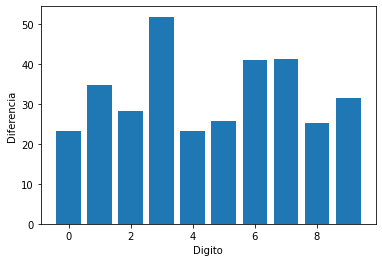

4 => 2


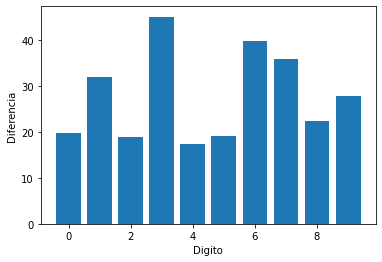

4 => 1


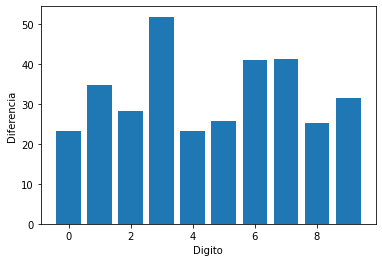

4 => 2


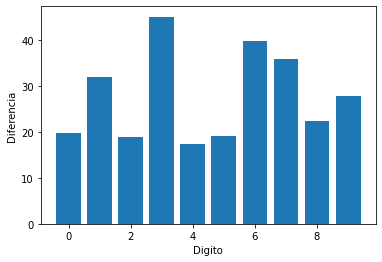

0 => 1


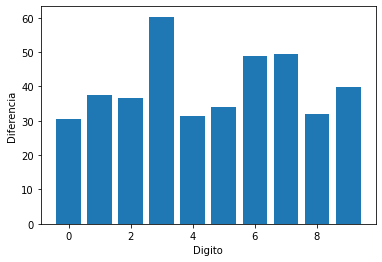

4 => 3


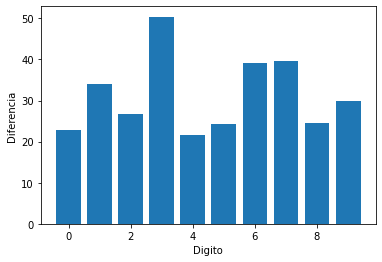

0 => 5


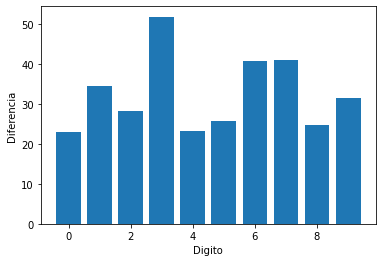

6 => 7


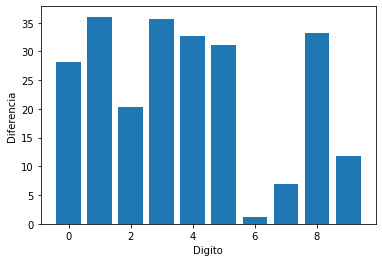

4 => 9


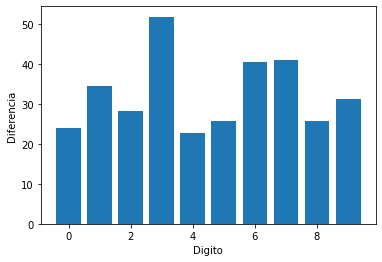

0 => 1


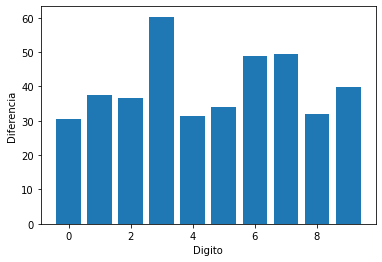

4 => 2


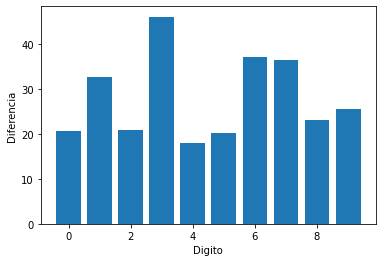

4 => 3


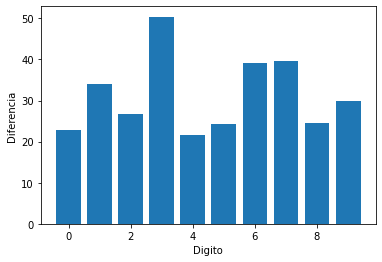

4 => 4


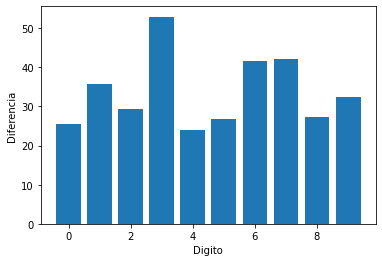

6 => 5


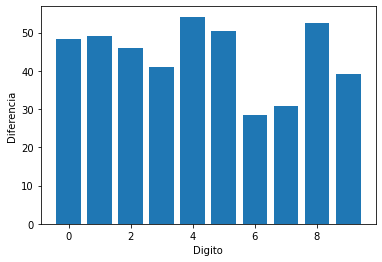

6 => 6


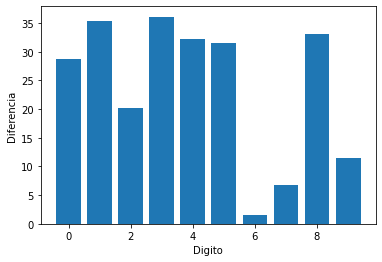

6 => 7


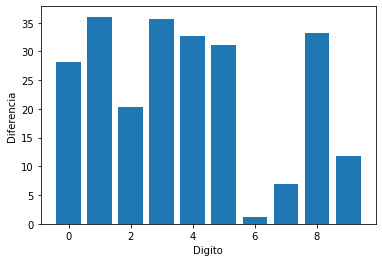

0 => 8


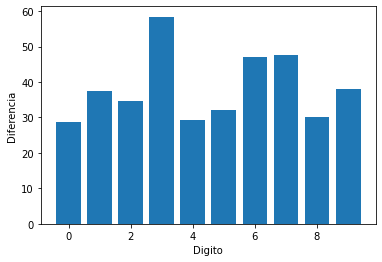

4 => 9


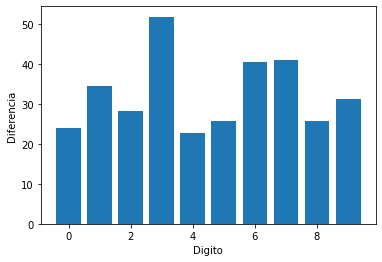

Accuracy: 0.1111111111111111


In [50]:
%matplotlib inline

usandoPromedios(HUs)

# Calculando la suma de las diferencias de la imagen en cuestion con todas las imagenes de entrenamiento

In [8]:
def predict(inputImg):

    CWD = './'

    DIGITS = [0,1,2,3,4,5,6,7,8,9]

    avgs = np.array([])

    # Recorrer los folders de los digitos
    for number in DIGITS:

        # Cronometro
        startTime = time.perf_counter()

        folder = CWD + str(number) + '/'

        # Ver los archivos del folder
        files = listdir(folder)
        
        distances = []

        # Recorremos los archivos del folder
        for file in files:
            
            # Leer imagen
            img = cv.imread(folder + file,0)
            
            # Calculamos diferencia de los momentos invariantes de Hu entre ambas imagenes
            huDistance = cv.matchShapes(inputImg,img,cv.CONTOURS_MATCH_I2,0)
           
            # Agregarmos la distancia al arreglo
            distances += [huDistance]

        avg = np.mean(distances)

        avgs = np.append(avgs,avg)

        #print("Procesado de " + str(number) + ': ' + str(round(time.perf_counter() - startTime,5)) + " s (" + str(len(files)) + ")")

    return np.argmin(avgs), avgs

Prediccion: 7 => 0


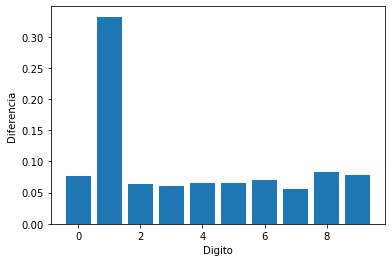

Prediccion: 2 => 2


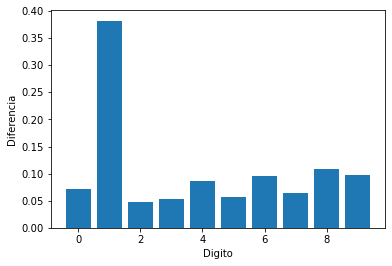

Prediccion: 7 => 1


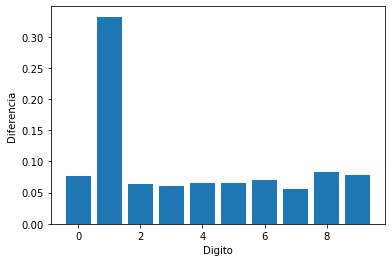

Prediccion: 2 => 2


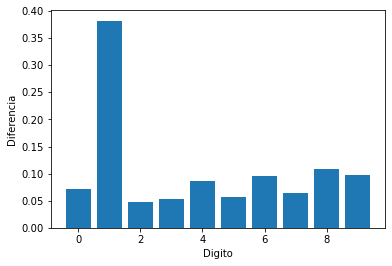

Prediccion: 8 => 1


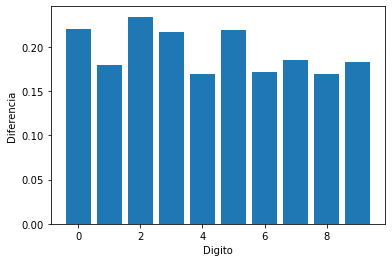

Prediccion: 7 => 3


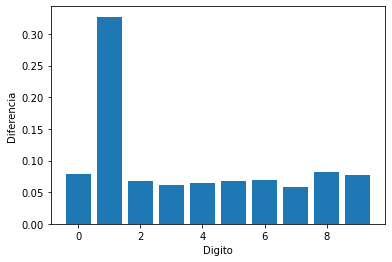

Prediccion: 7 => 5


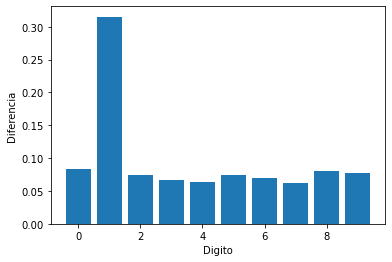

Prediccion: 2 => 7


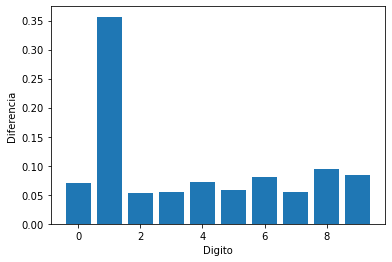

Prediccion: 4 => 9


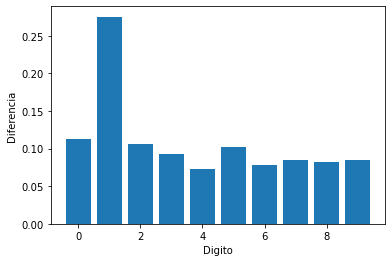

Prediccion: 8 => 1


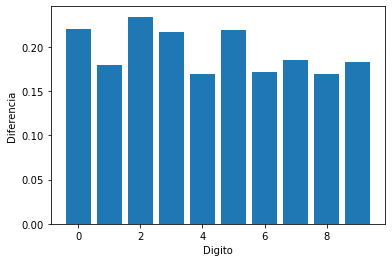

Prediccion: 2 => 2


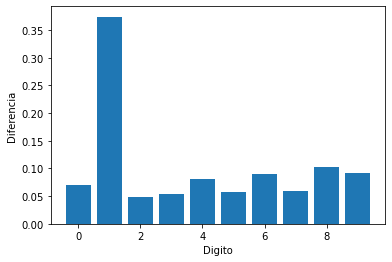

Prediccion: 7 => 3


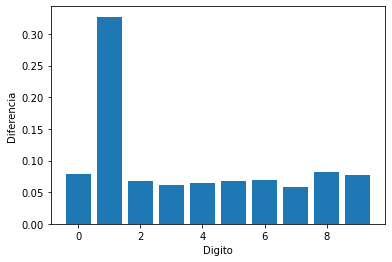

Prediccion: 4 => 4


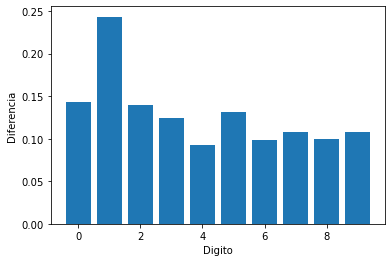

Prediccion: 2 => 5


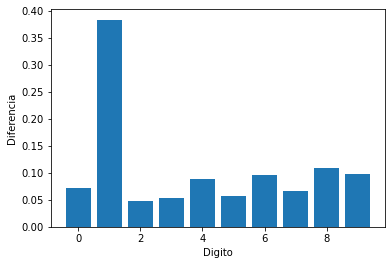

Prediccion: 7 => 6


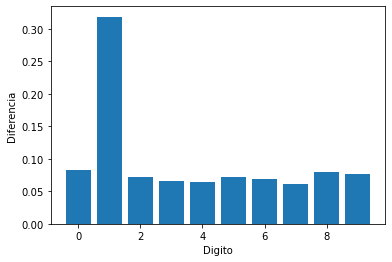

Prediccion: 2 => 7


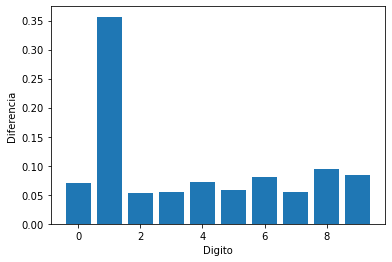

Prediccion: 4 => 8


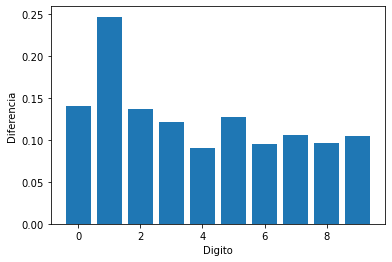

Prediccion: 4 => 9


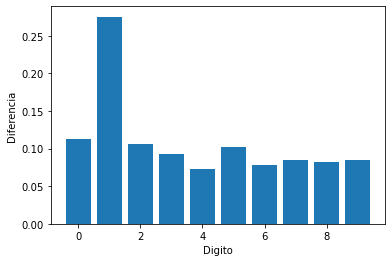

Accuracy:  0.2222222222222222


In [13]:
%matplotlib inline

testFiles = listdir('./test/')

accuracy = 0

for testFile in testFiles:
    #print(testFile)
    testImg = cv.imread('./test/'+testFile,0)

    # Castear el nombre del archivo a entero
    etiqueta = int(testFile.split('.')[0])

    momentos = get7Moments(testImg)

    prediction, avgs = predict(testImg)

    print("Prediccion:",prediction, "=>", etiqueta)

    accuracy += (prediction == etiqueta)

    plt.bar([0,1,2,3,4,5,6,7,8,9],avgs)
    plt.ylabel('Diferencia')
    plt.xlabel('Digito')
    plt.show()

print("Accuracy: ",accuracy/len(testFiles))

# Usando una imagen de referencia por digito

In [10]:
def predictWithReference(inputImg):

    CWD = './'

    avgs = np.array([])

    # Cronometro
    startTime = time.perf_counter()

    folder = CWD + "reference" + '/'

    # Ver los archivos del folder
    files = listdir(folder)

    distances = []

    # Recorremos los archivos del folder
    for file in files:
        
        # Leer imagen
        img = cv.imread(folder+file,0)
        
        # Calculamos diferencia de los momentos invariantes de Hu entre ambas imagenes
        huDistance = cv.matchShapes(inputImg,img,cv.CONTOURS_MATCH_I2,0)
        
        # Agregarmos la distancia al arreglo
        distances += [huDistance]

    #print("Procesado de " + str(number) + ': ' + str(round(time.perf_counter() - startTime,5)) + " s (" + str(len(files)) + ")")

    return np.argmin(np.array(distances)), distances

Prediccion: 5 => 0


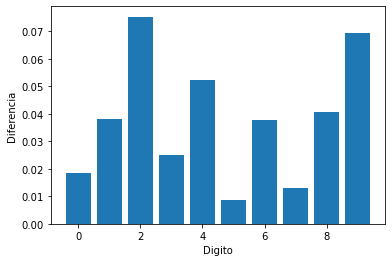

Prediccion: 2 => 2


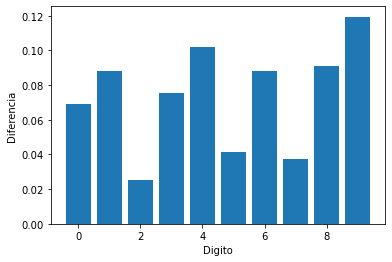

Prediccion: 5 => 1


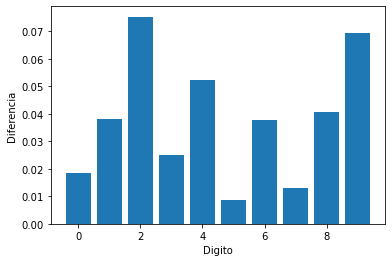

Prediccion: 2 => 2


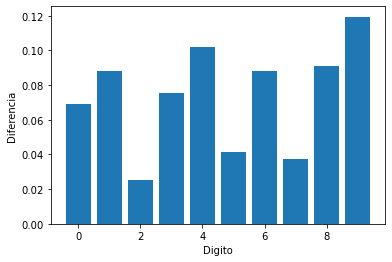

Prediccion: 9 => 1


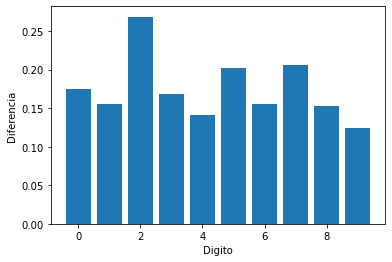

Prediccion: 0 => 3


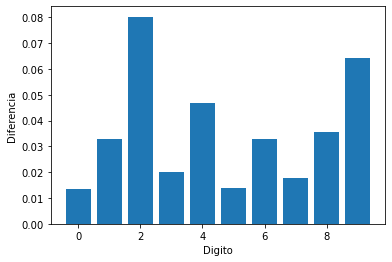

Prediccion: 0 => 5


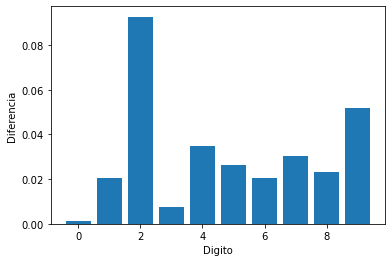

Prediccion: 7 => 7


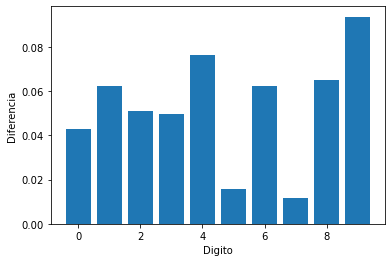

Prediccion: 4 => 9


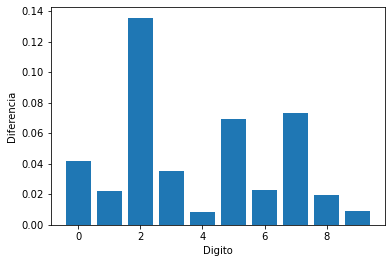

Prediccion: 9 => 1


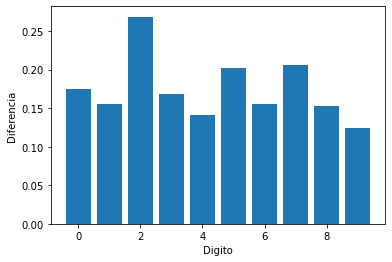

Prediccion: 7 => 2


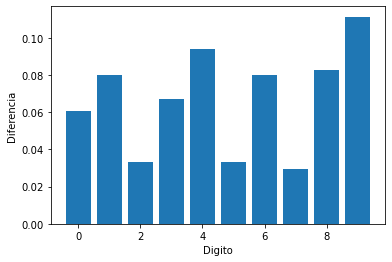

Prediccion: 0 => 3


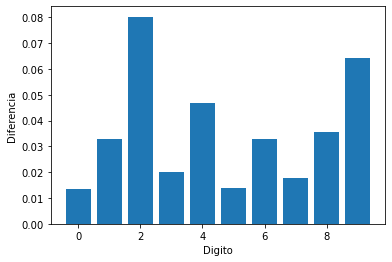

Prediccion: 9 => 4


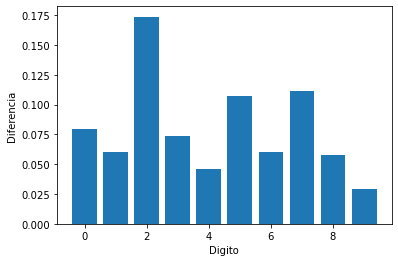

Prediccion: 2 => 5


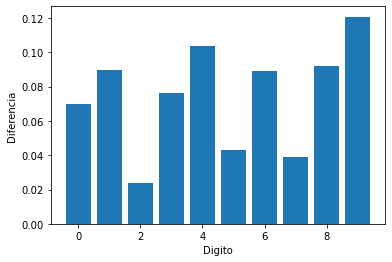

Prediccion: 0 => 6


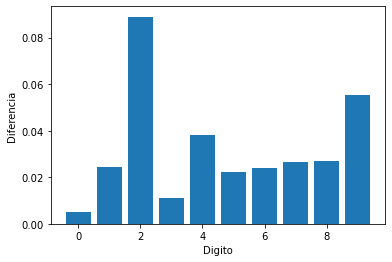

Prediccion: 7 => 7


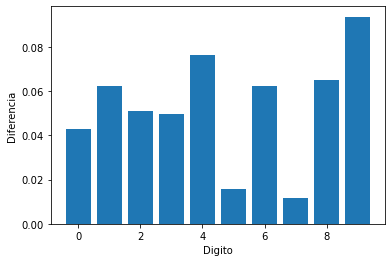

Prediccion: 9 => 8


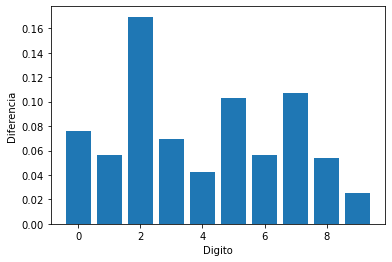

Prediccion: 4 => 9


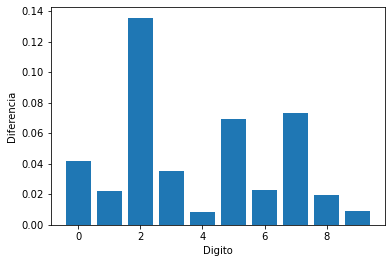

Accuracy:  0.2222222222222222


In [11]:
%matplotlib inline

testFiles = listdir('./test/')

accuracy = 0

for testFile in testFiles:
    #print(testFile)
    testImg = cv.imread('./test/'+testFile,0)

    # Castear el nombre del archivo a entero
    etiqueta = int(testFile.split('.')[0])
    
    #print(etiqueta)
    momentos = get7Moments(testImg)

    prediction, avgs = predictWithReference(testImg)

    print("Prediccion:",prediction, "=>", etiqueta)

    accuracy += (prediction == etiqueta)

    plt.bar([0,1,2,3,4,5,6,7,8,9],avgs)
    plt.ylabel('Diferencia')
    plt.xlabel('Digito')
    plt.show()

print("Accuracy: ",accuracy/len(testFiles))